# Encoding

Encoding is a technique of converting categorical variables into numerical values so that it could be easily fitted to a machine learning model.

***Let’s understand about the different types of categorical variables.***

## Nominal categorical variable:

Nominal categorical variables are those for which we do not have to worry about the arrangement of the categories.

#### Example,

1. Suppose we have a gender column with categories as Male and Female.
2. We can also have a state column in which we have different states like NY, FL, NV, TX

***So here we don’t have to worry about the arrangement of the categories.***

## Ordinal Categorical variable :

Ordinal categories are those in which we have to worry about the rank. These categories can be rearranged based on ranks.

#### Example,

1. Suppose in a dataset there is an education column which we will use to predict the salary of the person. The education column has categories like ‘bachelors’,’masters’,’PHD’. Based on the above categories we can rearrange this and assign ranks to each category. Based on the education level ‘PHD’ will get the highest rank (PHD-1, masters-2, bachelors-3).

## Types of Encoding:

1. Nominal Encoding
2. Ordinal Encoding

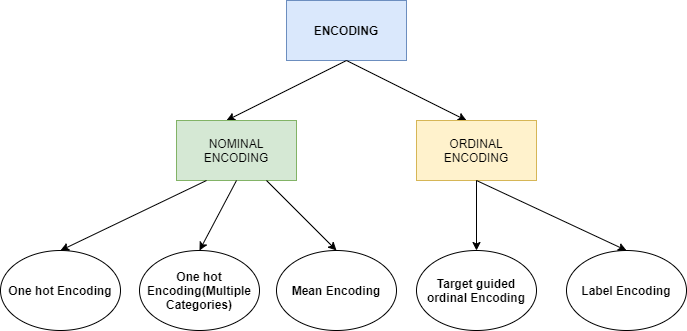

### 1. One Hot Encoding

- One hot encoding is a process of representing categorical data as a set of binary values, where each category is mapped to a unique binary value.
- In this representation, only one bit is set to 1, and the rest are set to 0, hence the name "one hot."
- This method is applied to nominal categorical variables.

Example, suppose we have a column containing 3 categorical variables, then in one hot encoding 3 columns will be created each for a categorical variable.

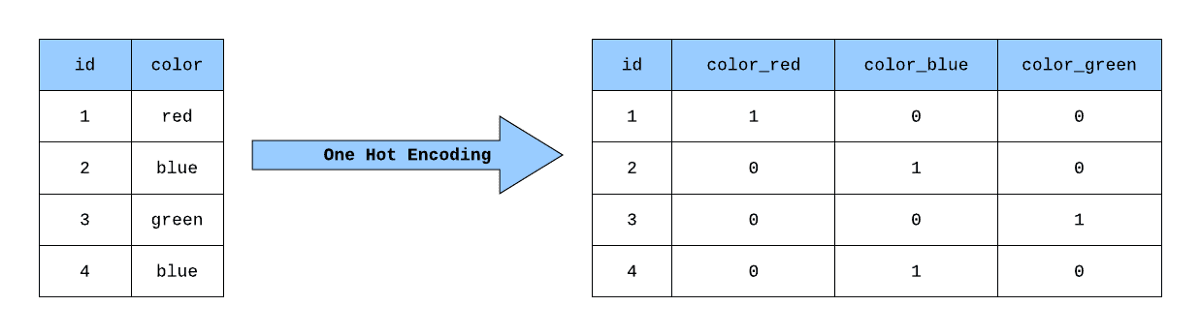

## Dummy Variable Trap

We can skip the last column ‘Green’ as 0,0 signifies green. This means, suppose we have ‘n’ columns, then the one hot encoding should create ‘n-1’ columns.

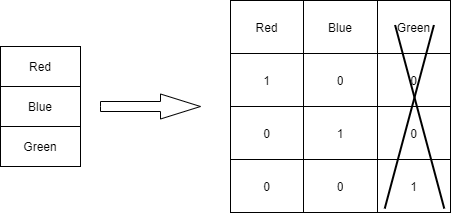

## Disadvantage

- Suppose we have a column which has 100 categorical variables. Now if we try to convert the categorical variables into dummy variable then we will get 99 columns.
- This will increase the dimension of the overall dataset which will lead to curse of dimensionality.

So basically, if there is a lot of categorical variables in a column then we should not apply this technique.

# pandas categorical to numeric

In [1]:
import pandas as pd

df = pd.DataFrame({
    "name": ["Golf", "A3", "Leon", "Passat", "X6M"],
    "price": [32000, 38000, 28000, 36000, 75000],
    "brand": ["VW", "Audi", "Seat", "VW", "BMW"],
    "color": ["Black", "Blue", "Red", "Blue", "Black"]
    })

df

,name,price,brand,color
0,Golf,32000,VW,Black
1,A3,38000,Audi,Blue
2,Leon,28000,Seat,Red
3,Passat,36000,VW,Blue
4,X6M,75000,BMW,Black


In [3]:
pd.get_dummies(data=df, dtype=int)

,price,name_A3,name_Golf,name_Leon,name_Passat,name_X6M,brand_Audi,brand_BMW,brand_Seat,brand_VW,color_Black,color_Blue,color_Red
0,32000,0,1,0,0,0,0,0,0,1,1,0,0
1,38000,1,0,0,0,0,1,0,0,0,0,1,0
2,28000,0,0,1,0,0,0,0,1,0,0,0,1
3,36000,0,0,0,1,0,0,0,0,1,0,1,0
4,75000,0,0,0,0,1,0,1,0,0,1,0,0


In [8]:
pd.get_dummies(data=df, dtype=int).shape

(5, 13)

In [5]:
pd.get_dummies(data=df, columns=['brand'], dtype=int)

,name,price,color,brand_Audi,brand_BMW,brand_Seat,brand_VW
0,Golf,32000,Black,0,0,0,1
1,A3,38000,Blue,1,0,0,0
2,Leon,28000,Red,0,0,1,0
3,Passat,36000,Blue,0,0,0,1
4,X6M,75000,Black,0,1,0,0


# `OneHotEncoder` from the sklearn

In [6]:
# one-hot-encode using sklearn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_results = encoder.fit_transform(df).toarray()
encoded_results

array([[0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
        0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        1.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
        0.]])

In [7]:
encoded_results.shape

(5, 17)

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_result = encoder.fit_transform(df[['color']]).toarray()
encoded_result

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [11]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_result1 = encoder.fit_transform(df[['color','brand']]).toarray()
encoded_result1

array([[1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0.]])

# 2. Label Encoding

This technique will be used only for Ordinal categories. Ranks are provided based on the importance of the category. Below table illustrates that PHD is considered as the highest degree, so the highest label is given to it and so on.

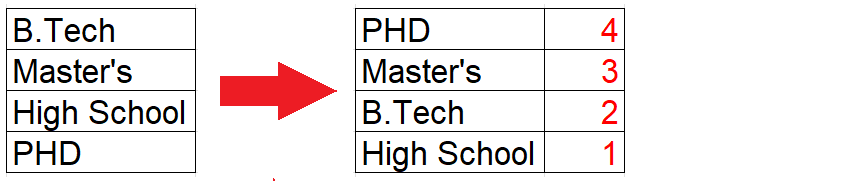

In [12]:
import pandas as pd

import pandas as pd

# generate df with 1 col and 4 rows
data = {
    "fruit": ["apple", "banana", "orange", "apple"]
}

# show head
df = pd.DataFrame(data)
df.head()

,fruit
0,apple
1,banana
2,orange
3,apple


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder(d)

d = le.fit_transform(df['fruit'])
d

array([0, 1, 2, 0])

In [15]:
new_df = pd.DataFrame({
    "name": ["Golf", "A3", "Leon", "Passat", "X6M"],
    "price": [32000, 38000, 28000, 36000, 75000],
    "brand": ["VW", "Audi", "Seat", "VW", "BMW"],
    "color": ["Black", "Blue", "Red", "Blue", "Black"]
    })

new_df

,name,price,brand,color
0,Golf,32000,VW,Black
1,A3,38000,Audi,Blue
2,Leon,28000,Seat,Red
3,Passat,36000,VW,Blue
4,X6M,75000,BMW,Black


In [19]:
le1 = LabelEncoder()

d1 = le.fit_transform(new_df['name'])
d1

array([1, 0, 2, 3, 4])

In [22]:
le1 = LabelEncoder()

d2 = le.fit_transform(new_df['brand'])
d2

array([3, 0, 2, 3, 1])

>**Both #OneHotEncoder and pd.get_dummies are used to convert categorical data into numerical data. However, there are some key differences between the two methods.**

    🦯 OneHotEncoder is a Scikit-Learn class, while pd.get_dummies is a Pandas function. This means that   OneHotEncoder can be used with other Scikit-learn tools, such as pipelines and estimators. pd.get_dummies, on the other hand, can only be used with Pandas tools.

    🦯 Another difference is that OneHotEncoder can handle unknown categories, while pd.get_dummies cannot. If a category does not exist in the training data, pd.get_dummies will raise an error. OneHotEncoder, on the other hand, will simply ignore the unknown category.
    
    🦯 Finally, OneHotEncoder can be used to create a sparse matrix, while pd.get_dummies cannot. A sparse matrix is a matrix that has a lot of zeros. This can be useful for saving memory and speed up computation. pd.get_dummies, on the other hand, will always create a dense matrix.

***In general, OneHotEncoder is the preferred method for converting categorical data into numerical data.*** 

However, pd.get_dummies can be a good option if you are not using other Scikit-learn tools or if you do not need to handle unknown categories.

`**Ultimately, the best way to choose between OneHotEncoder and pd.get_dummies depends on your specific needs.**`